In [1]:
!pip install gensim
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!cd gdrive/My' 'Drive/Colab' 'Notebooks
!ls gdrive/My' 'Drive/Colab' 'Notebooks
import os
os.chdir("gdrive/My Drive/Colab Notebooks")

Mounted at /content/gdrive
 bert.ipynb		        modelvc_colab.model.trainables.syn1neg.npy
 bertmodel		        modelvc_colab.model.wv.vectors.npy
 bert_trained.png	        modelvc.model
 bot_model3.py		        modelvc.model.syn1neg.npy
 bot_model_fin2.py	        modelvc.model.wv.vectors.npy
 bot_model_final.py	        movie_conversations.txt
 bot_model_fin.py	        movie_lines.txt
 bot_models.py		        pre2_run.ipynb
 bot_train_savefile.py	        pre2_savefile.ipynb
 conv.txt		        pre.ipynb
'Copy of pre2_savefile.ipynb'   __pycache__
'Copy of pre.ipynb'	        questions-word2s.txt
 data_2.json		        questions-words.txt
 datapre.py		        td.txt
 embeddings_colab.kv	        test.txt
 embeddings.kv		        uncased_L-2_H-128_A-2
 fc_net_git.py		        Untitled
 fc_net.py		        Untitled0.ipynb
 layers			        Untitled1.ipynb
 model			        Untitled2.ipynb
 model_plot.png		        Untitled3.ipynb
 modelvc_colab.model	        w2v.txt


In [2]:
import sys
import math

import keras
#import tflearn
import tensorflow as tf
from keras import regularizers
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.ops import rnn_cell
from tensorflow.python.ops import rnn
import chardet
import numpy as np
import struct



question_seqs = []
answer_seqs = []

max_w = 10
float_size = 4
wordvecname = "embeddings_colab.kv"
from gensim.models import Word2Vec, KeyedVectors
word_vector_dict = KeyedVectors.load(wordvecname)
word_vec_dim = 200
max_seq_len = 10
word_set = {}
limit = 10000
ep = 1000
wordvc =  Word2Vec.load("modelvc_colab.model")
data = KeyedVectors.load(wordvecname)
dmax = 1#np.max(data.vectors) # 1 : value for <pad> and <eos>
dmin = 0.001#np.min(data.vectors) # 0 : value for <go>
from keras import backend as K


In [3]:
!pwd

/content/gdrive/My Drive/Colab Notebooks


In [4]:
from bot_models import MySeq2Seq

In [5]:
my_seq2seq = MySeq2Seq(word_vec_dim=word_vec_dim, max_seq_len=max_seq_len)

Epoch 1/1000
123/123 [==============================] - 12s 67ms/step - loss: -0.1676 - soft_acc: 0.0860
Epoch 2/1000
123/123 [==============================] - 8s 68ms/step - loss: -0.2328 - soft_acc: 0.0286
Epoch 3/1000
123/123 [==============================] - 8s 68ms/step - loss: -0.2429 - soft_acc: 0.0300
Epoch 4/1000
123/123 [==============================] - 8s 69ms/step - loss: -0.2485 - soft_acc: 0.0329
Epoch 5/1000
123/123 [==============================] - 8s 69ms/step - loss: -0.2578 - soft_acc: 0.0335
Epoch 6/1000
123/123 [==============================] - 8s 68ms/step - loss: -0.2613 - soft_acc: 0.0359
Epoch 7/1000
123/123 [==============================] - 8s 68ms/step - loss: -0.2707 - soft_acc: 0.0361
Epoch 8/1000
123/123 [==============================] - 8s 68ms/step - loss: -0.2778 - soft_acc: 0.0355
Epoch 9/1000
123/123 [==============================] - 8s 68ms/step - loss: -0.2839 - soft_acc: 0.0377
Epoch 10/1000
123/123 [==============================] - 8s 68m

INFO:tensorflow:Assets written to: ./model/botfin/assets


INFO:tensorflow:Assets written to: ./model/botfin/assets


INFO:tensorflow:Assets written to: ./model/encoderfin/assets


INFO:tensorflow:Assets written to: ./model/encoderfin/assets


INFO:tensorflow:Assets written to: ./model/decoderfin/assets


INFO:tensorflow:Assets written to: ./model/decoderfin/assets


saved


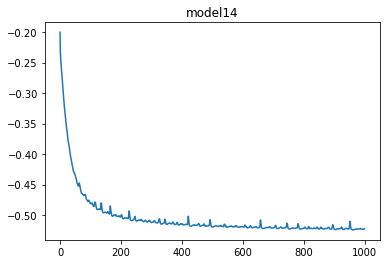

In [16]:
my_seq2seq.train2()

In [6]:
def vector_sqrtlen(vector):
    len = 0
    for item in vector:
        len += item * item
    len = math.sqrt(len)
    return len

def vector_cosine(v1, v2):
    if len(v1) != len(v2):
        sys.exit(1)
    sqrtlen1 = vector_sqrtlen(v1)
    sqrtlen2 = vector_sqrtlen(v2)
    value = 0
    for item1, item2 in zip(v1, v2):
        value += item1 * item2
    return value / (sqrtlen1*sqrtlen2)


def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true*10), K.round(y_pred*10)))

def vector2word(vector):
    max_cos = -10000
    match_word = ''
    for word in word_vector_dict:
        v = word_vector_dict[word]
        cosine = vector_cosine(vector, v)
        if cosine > max_cos:
            max_cos = cosine
            match_word = word
    return (match_word, max_cos)

def vector2word2(vector):
        max_cos = -10000
        match_word = ''
       # for word in data.index_to_key:
        #    v = data[word]
         #   cosine = vector_cosine(vector, v)
        #    if cosine > max_cos:
         #       max_cos = cosine
          #      match_word = word
        match_word = wordvc.wv.most_similar(positive=[vector], topn=1)
        match_vec = wordvc.wv.get_vector(match_word[0][0]).reshape((200,1))
        eos_vec = np.zeros((200,1))

        eosdist1 = np.linalg.norm(vector)
     #   eosdist = eosdist1/eosdist2
      #  if(match_word[0][1] <  eosdist):
      #       match_word[0] = ('<EOS>',eosdist)
        return (match_word, max_cos, eosdist1)


In [10]:
my_seq2seq.load()
testX1 ='what is your name?'

testX = [testX1,testX2,testX3,testX4,testX5,testX6,testX8,testX7,testX9,testX10]
for ii in range(len(testX)):
    testXX = my_seq2seq.generate_test(testX[ii])
    predict = my_seq2seq.mypredict(testXX, max_seq_len, word_vec_dim)
    print("\n")
    print(testX[ii])
    for w in predict:
        # print(w)
        (match_word, max_cos, eosdist) = vector2word2(w)
        if(match_word[0][1] <  0.6):
           break
        print(match_word, vector_sqrtlen(w), "  ", eosdist)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 200)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 200)]  0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 200), (None, 320800      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 200),  320800      input_2[0][0]                    
                                                                 lstm[0][1]                   